## 영상정보처리 12주차 과제 템플리트
- 마감: 11월 22일 11시 59분 PM
- 점수: 10점 만점
    
이름: 이상민          
학번: 32153180

입력 이미지: 자유



# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd /gdrive/MyDrive/ImageProcClass/Week12
%ls

/gdrive/MyDrive/ImageProcClass/Week12
2020-2-ImgProc-HW12-이상민-32153180.ipynb


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path1 = '../Dongkeun-OpenCV-ImgData/cat.png'
image_path2 = '../Dongkeun-OpenCV-ImgData/sudoku.png'

def show_with_matplotlib_gray(img, title):
  plt.title(title)
  plt.axis('off')
  plt.imshow(img, cmap="gray")

##문제 1

입력 이미지는 자유롭게 선택을 하여, Canny Algorithm 의 패러미터에 변경에 따른 결과를 보이고, 간단하게 이해한 바를 정리하시오. 







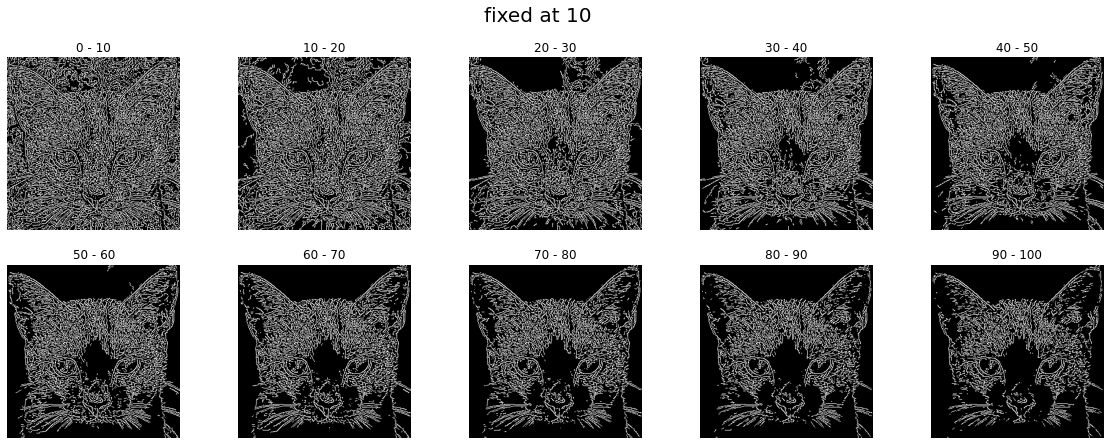

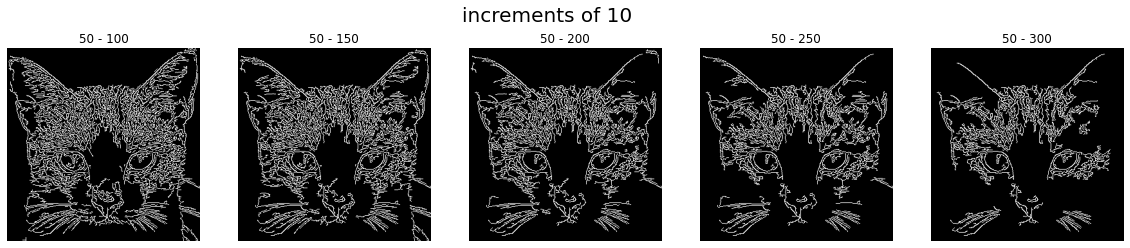

In [4]:
# parameter 변경 방법
# 10 ~ 100, step 10으로 고정
# 50 ~ 300, step 10씩 증가

img = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)

# 1. step 10으로 고정
steps = [x for x in range(10, 110, 10)]
plt.figure(figsize=(20, 7))
i = 1
for step in steps:
  edge = cv2.Canny(img, step-10, step)
  plt.subplot(2, 5, i)
  show_with_matplotlib_gray(edge, '{} - {}'.format(step-10, step))
  i += 1

plt.suptitle('fixed at 10', fontsize=20)
plt.show()

print('\n\n')

# 2. step 10씩 증가
steps = [x for x in range(100, 350, 50)]
plt.figure(figsize=(20, 4))
i = 1
for step in steps:
  edge = cv2.Canny(img, 50, step)
  plt.subplot(1, 5, i)
  show_with_matplotlib_gray(edge, '{} - {}'.format(50, step))
  i += 1

plt.suptitle('increments of 10', fontsize=20)
plt.show()

### canny edge detection step
1. 가우시안 필터링 사용해서 블러링 (노이즈 없앰)
2. ntensity gradient를 찾아내서 그거를 근거로 어떤 픽셀이 엣지에 들어가는지 찾아낸다

### basic features
- sobel보다 엣지가 선명하고 가는 특징
- 구간이 작아질수록 섬세 구간이 커지면 노이즈는 사라지는 경향

### description
- fixted at 10
  - 숫자가 낮을수록 선이 굉장히 가늘고 촘촘하지만 배경 이미지에 대한 노이즈가 많다.
  - 숫자가 높을수록 이러한 노이즈가 사라지고 대상 윤곽이 뚜렷하다.

- increments of 10
  - 숫자가 낮을수록 더 많은 edge를 뽑아낸다.
  - 숫자가 높을수록 edge를 간략하게 뽑아낸 느낌이 든다.

##문제 2

입력 이미지는 자유롭게 선택을 하여, 통계적 Hough Transform 에 사용되는 패러미터 변경에 따른 결과를 보이고, 간단하게 이해한 바를 정리하시오. 

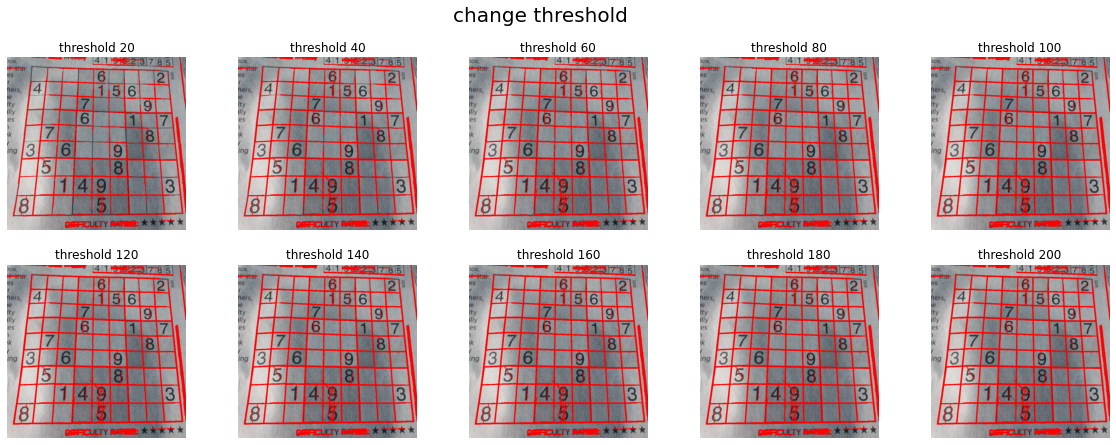

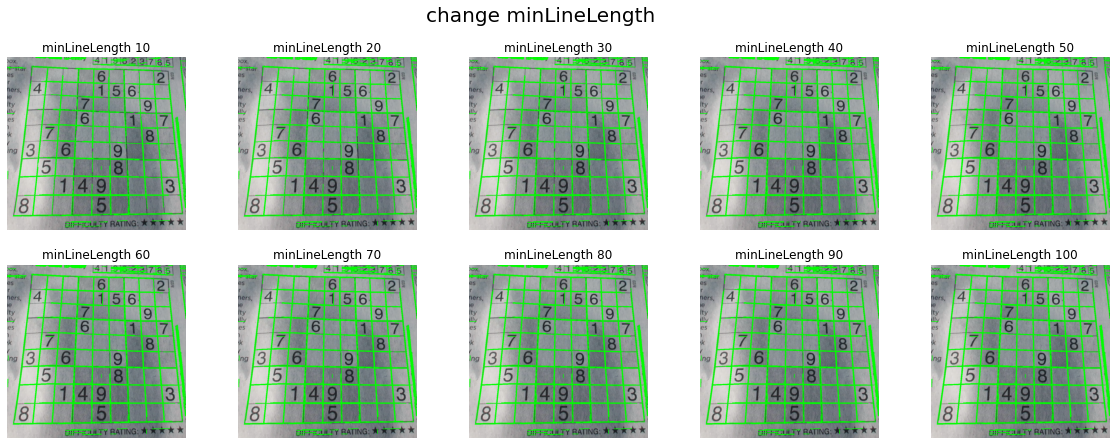

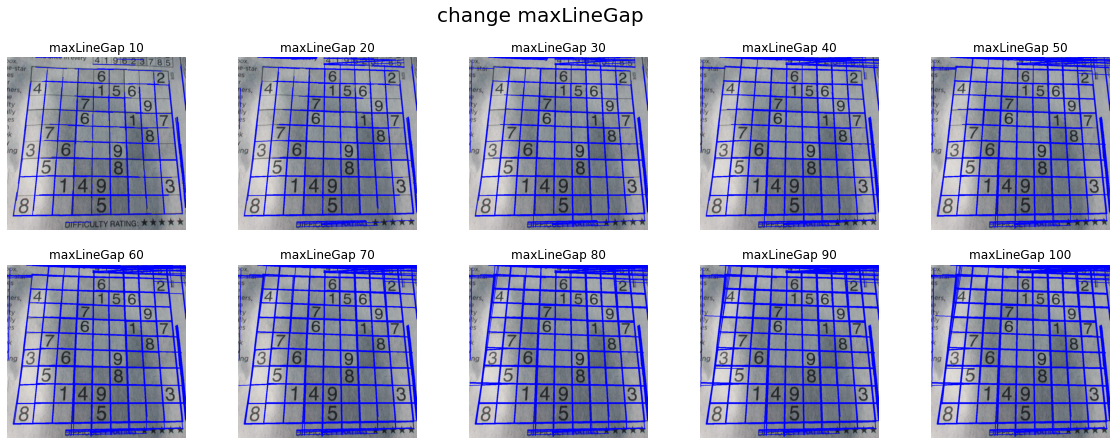

In [5]:
# parameter 변경 방법
# threshold 변경 (나머지 고정)
# minLineLength 변경 (나머지 고정)
# maxLineGap 변경 (나머지 고정)


# 1. threshold 변경
img = cv2.imread(image_path2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

steps = [x for x in range(20, 220, 20)]
plt.figure(figsize=(20, 7))
i = 1
for step in steps:
  edge = cv2.Canny(gray, 50, 200)
  plt.subplot(2, 5, i)
  lines = cv2.HoughLinesP(edge, rho=1, theta=np.pi/180.0, threshold=step, minLineLength=50, maxLineGap=10)
  for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(img,(x1, y1), (x2, y2), (255, 0, 0), 2)
  show_with_matplotlib_gray(img, 'threshold {}'.format(step))
  i += 1

plt.suptitle('change threshold', fontsize=20)
plt.show()

print('\n\n')

# 2. minLineLength 변경
img = cv2.imread(image_path2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

steps = [x for x in range(10, 110, 10)]
plt.figure(figsize=(20, 7))
i = 1
for step in steps:
  edge = cv2.Canny(gray, 50, 200)
  plt.subplot(2, 5, i)
  lines = cv2.HoughLinesP(edge, rho=1, theta=np.pi/180.0, threshold=100, minLineLength=step, maxLineGap=10)
  for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(img,(x1, y1), (x2, y2), (0, 255, 0), 2)
  show_with_matplotlib_gray(img, 'minLineLength {}'.format(step))
  i += 1

plt.suptitle('change minLineLength', fontsize=20)
plt.show()

print('\n\n')

# 3. maxLineGap 변경
img = cv2.imread(image_path2)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

steps = [x for x in range(10, 110, 10)]
plt.figure(figsize=(20, 7))
i = 1
for step in steps:
  edge = cv2.Canny(gray, 50, 200)
  plt.subplot(2, 5, i)
  lines = cv2.HoughLinesP(edge, rho=1, theta=np.pi/180.0, threshold=100, minLineLength=100, maxLineGap=step)
  for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(img,(x1, y1), (x2, y2), (0, 0, 255), 2)
  show_with_matplotlib_gray(img, 'maxLineGap {}'.format(step))
  i += 1

plt.suptitle('change maxLineGap', fontsize=20)
plt.show()

### basic features
- 오브젝트가 겹쳐져 있는 경우에는 에러 발생률 높아

### description
- change threshold
  - threshold 20과 200을 비교해보면 직관적으로 200일 때 스도쿠의 행과 열을 잘 검출해낸 것을 알 수 있다. 하지만 가운데 아래에 있는 5와 9 숫자에 노이즈가 생긴 것을 확인할 수 있다.

- change minLineLength
  - 이 역시 선의 최소 길이 값을 크게할수록 스도쿠 형상을 잘 잡아냈다.

- change maxLineGap
  - 선과 선 사이 최대 허용간격을 늘릴수록 주변에 다른 선들이 많이 잡혔다. maxLineGap 100일 때 스도쿠의 바둑판 배열은 잘 잡아냈지만 우측 상단과 하단에 직선이 훨씬 많이 생긴 것을 볼 수 있다.